## EECS 491 Assignment 2

Due Mon Mar 4 before midnight. 100 points total.

### Submitting assignments to Canvas

- For jupyter notebooks, submit the .ipynb file and a pdf or html export of the notebook.  Make sure the output represents the latest state of your notebook.  If you use interactive plots, make sure the output for the static file is representative of the points you wish to make.  If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  Do not include binaries or large data files.

- Use the following format for filenames:
  - `EECS491-A2-yourcaseid.ipynb`
  - `EECS491-A2-yourcaseid.pdf`

- If you have more than these two files, put all your files in a directory named `EECS491-A2-yourcaseid`. Then zip the directory and submit it with the name `EECS491-A2-yourcaseid.zip`.  Do not use other compression formats.

### Q1. Conditional Independence (10 pts)

Consider the following Bayes net.

1.1. (5 pts) Show that $a$ is independent of $b$ given no other infomration, i.e.
$$
a \perp b\, |\, \varnothing
$$

$$
p(a,b,c) = p(a)p(b)p(c|a,b) \\
p(a,b) = \sum_c{p(a)p(b)p(c|a,b)} = p(a)p(b)\sum_c{p(c|a,b)}g \Rightarrow a \perp b\, |\, \varnothing
$$


1.2. (5 pts) Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$

$$
\begin{align}
p(a,b|e) &= \frac{p(a,b,e)}{p(e)} \\ 
&= \sum_c\frac{p(a,b,c,e)}{p(e)} \\
&=\frac{\sum_c{p(a)p(b)p(c|a,b)p(e|c)}}{p(e)} \Rightarrow a \not\perp b\, |\, e
\end{align}
$$


### Q2. Conditional Independence and Causality (5 pts)

Consider the following model

Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?

$$ 
p(b|a)p(a|b)p(a)\, =\, p(b)p(a|b)p(c|a)\, =\, p(c)p(a|c)p(b|a)
$$

The assumption is $b \perp  c\, | \, a$

### Q3. Model Complexity, Free Parameters, and Simplifying Assumptions (20 pts)

3.1. (5 pts) Consider a general probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?

$$
p(x_1 \ldots x_N) = \prod_{i=1}^{N}p(x_i|pa(x_i))
$$

3.2. (5 pts) What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.)

$$
K^N-1
$$

3.3. (5 pts) Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?

$$
K^m - 1
$$


3.4. (5 pts) Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (see Q3).  What is the expression for the number of parameters in this case?

$$
Nm - 1
$$

### Q4. Models of Conditional Probability (20 pts)

In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.

4.1 (5 pts) Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.

The value of $x_j$ will influence the result of noisy-OR function. If the all $x_i$ equal to 0, the fianl result will be $\mu_{i0}$. Otherwise, if any $x_i$ is 1, the result will be close to 1. Thus, noisy-OR function can be interpreted as a "soft" of the logical OR function


4.2 (5 pts) What is the interpretation of $\mu_{i0}$? Provide a clear explanation.

$\mu_{i0}$ is Noisy transmitter. It represent the uncertainy of the model and probability of factors, which are not belongs to paretns, activating $x_i$. 

Another choice for the conditional probability is a sigmoid function

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

where $\sigma (a)$ is the logistic sigmoid function.

4.3 (5 pts) Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?

For a sigmoid function $\sigma = \frac{1}{1+e^{-a}}$, $a$ and $\sigma(a)$ have monotonically increasing relationship. $w_{i0}+\sum_{j\in pa(x_i)}w_{ij}x_j$ and parents of $x_i$ become 1 also have montonically increasing relationship, when $w$ are non-negative. When $w$ are non-negative, sigmoid function is the same as the noisy-or function. However, $w$ could be negative. When a certain $w_j$ is negative, it can be interpreted to $\neg p(x_j)$. When all $w_ij$ are negative, these can be interpreted to $\neg pa(x_i)$. Therefore, sigmoid functiuon is more general than the noisy-or function. 

4.4 (5 pts) Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.


Case 1:
In a case, the parents of $x_i$ have differnet influence on the final result of $x_i$. In sigmoid function, we can change the weight $w$ to do it. However, in the noisy-or function, we can't handle this situation. 


Case 2: 
In this case, we have a varaibel which have a lot of parents and we only know a specific one is 1. In sigmoid function, the result of $w_{i0}+\sum_{j\in pa(x_i)}w_{ij}x_j$ will be still a small value and sigmoid function may still get a very small value. However, in noisy-or function, one parent varaible existed are enough to make the probability of $x_i$ be enough large. Thus, noisy-or is better choice.


### Q5. Car Troubles (Barber Exercise 3.6) (25 pts)

5.1 (10 pts) Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the **Inference** section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.

\begin{align}
p(f=\textsf{empty} | s=\textsf{no}) &= \frac{\sum_b\sum_g\sum_tp(b)p(F)p(S|F,t)p(t|b)p(g|b,F)}{\sum_b\sum_f\sum_tp(f)p(b)p(t|b)p(S|t,f)} = 0.4537
\end{align}


5.2 (5 pts) Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.



In [3]:
from pgmpy.models import BayesianModel 
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel()
model.add_edges_from([('F', 'S'), ('F', 'G'), ('B','G'),('B','T'),('T','S')])

# B: bad, good 0 1 
priorB = TabularCPD(variable='B', variable_card=2, values=[[0.02, 0.98]])

# F: empty, no empty 0 1
priorF = TabularCPD(variable='F', variable_card=2, values=[[0.05, 0.95]])

# 
cpdG= TabularCPD(variable='G', variable_card=2, 
                 evidence=['B', 'F'], evidence_card=[2, 2], 
                 values=[[0.99, 0.1, 0.97, 0.04], [0.01, 0.9, 0.03, 0.96]])

cpdT= TabularCPD(variable='T', variable_card=2, 
                 evidence=['B'], evidence_card=[2], 
                 values=[[0.98, 0.03], [0.02, 0.97]])


cpdS= TabularCPD(variable='S', variable_card=2, 
                 evidence=['T', 'F'], evidence_card=[2, 2], 
                 values=[[0.99, 1, 0.92, 0.01], [0.01, 0, 0.08, 0.99]])

model.add_cpds(priorB, priorF, cpdG, cpdT, cpdS)

model.check_model()

True

In [4]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
print(inference.query(['F'], evidence={'S' : 0}) ['F'])

+-----+----------+
| F   |   phi(F) |
+=====+==========+
| F_0 |   0.4537 |
+-----+----------+
| F_1 |   0.5463 |
+-----+----------+


5.3 (10 pts) Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios.

**Scenario I**

\- "What is gauge show?"
\- "Empty"
\- "Are you turning over?"
\- "Yes"


Before ask the question, we are more believe that the car can start. When I asked the first question, I belive the car can't start rather than can. The second question, weak my belief. 

In [5]:
inference = VariableElimination(model)
# before ask
print(inference.query(['S'])['S'])
# first question 
print(inference.query(['S'], evidence={'G':0}) ['S'])
# second question 
print(inference.query(['S'], evidence={'G':0,'T':1}) ['S'])

+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   0.1018 |
+-----+----------+
| S_1 |   0.8982 |
+-----+----------+
+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   0.5492 |
+-----+----------+
| S_1 |   0.4508 |
+-----+----------+
+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   0.5201 |
+-----+----------+
| S_1 |   0.4799 |
+-----+----------+


**Scenario I**

\- "Are you turning over?"
\- "No"
\- "What is gauge show?"
\- "Full"


When I didn't ask anything, I believe the car can't start. When i asked the first question, I am strongly believe that the car can't start. After I asked the second question, I am pretty sure that the car couldn't start.

In [6]:
inference = VariableElimination(model)
# before ask
print(inference.query(['S'])['S'])
# first question 
print(inference.query(['S'], evidence={'T':0}) ['S'])
# second question 
print(inference.query(['S'], evidence={'G':1,'T':0}) ['S'])

+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   0.1018 |
+-----+----------+
| S_1 |   0.8982 |
+-----+----------+
+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   0.9995 |
+-----+----------+
| S_1 |   0.0005 |
+-----+----------+
+-----+----------+
| S   |   phi(S) |
+=====+==========+
| S_0 |   1.0000 |
+-----+----------+
| S_1 |   0.0000 |
+-----+----------+


### Exploration (20 pts)


Like in the first assignment, in this problems, you have more lattiude and are meant to do creative exploration.  Like before you don't need to write a book chapter, but the intention is for you to go beyond what's been covered above.

Implement a belief network of your own choosing or design.  It should be more complex that the examples above.  It should be discrete (we will cover continous models later). Use the model to illustrate deductive inference problems.

The grading is necessarily subjective, but here is a rubric:
- Was scenario you are trying to model clearly described? (5 pts)
- Were the variables and states well-chosen and clearly explained? (5 pts)
- How well did the examples to illustrate the model? (5 pts)
- Did the model go beyond or is distinct from what was already convered in the questions above? For example, larger numbers of nodes with more complex interactions or more variable states or using simplifying assumptions for conditional probabilities like noisy-OR, etc. (5 pts)


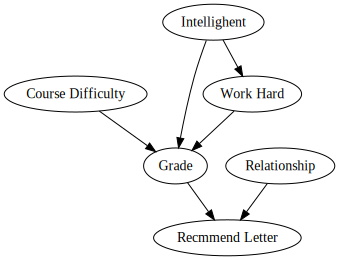

In [7]:
from graphviz import Digraph
dot = Digraph()
dot.node('D','Course Difficulty')
dot.node('I','Intellighent')
dot.node('G', 'Grade')
dot.node('L','Recmmend Letter')
dot.node('R','Relationship')
dot.node('H','Work Hard')
         
dot.edges(['DG','IG','HG','IH','GL','RL'])

dot

There is a model about whether studet get recommend letter. Grade have 4 varaibales: A, B, C,D. Intelligent also has 3 level: high, medium, low. Other elements all have 2 varaible. Assume we have prior probability and conditional probability as below. 

We wanted to know the belief of getting letter of a student have good intelligent, working hard, taking a hard course, having a good realtionship with lectuer and got A in the course.

In [8]:
model = BayesianModel()
model.add_edges_from([('D', 'G'), ('I', 'G'), 
                      ('H','G'),('I','H'),('G','L'),('R','L')])


# Course Difficulity [easy hard]
priorD = TabularCPD(variable='D', variable_card=2, values=[[0.5, 0.5]])

# Intelligent [low, medium, high]
priorI = TabularCPD(variable='I', variable_card=3, values=[[0.2, 0.7, 0.1]])

# relation with lectuer 
priorR = TabularCPD(variable='R', variable_card=2, values=[[0.6,0.4]])

# Hard Working 
cpdH= TabularCPD(variable='H', variable_card=2, 
                 evidence=['I'], evidence_card=[3], 
                 values=[[0.8,0.4,0.7], [0.2, 0.6,0.3]])

# Geade 000 001 010 011 020 021 100 101 110 111 120 121
cpdG= TabularCPD(variable='G', variable_card=4, 
                 evidence=['D','I','H'], evidence_card=[2, 3, 2], 
                 values=[[0.8, 0.1, 0.3, 0.05, 0.1, 0.01, 0.99, 0.3, 0.3, 0.15, 0.1, 0.05],
                         [0.2, 0.3, 0.45, 0.2, 0.3, 0.09, 0.01, 0.4, 0.4, 0.25, 0.2, 0.1 ],
                         [0,   0.5, 0.25, 0.4, 0.5, 0.1,  0,    0.25,0.3, 0.3,  0.3, 0.3],
                         [0,   0.1, 0,    0.35,0.1, 0.8,  0,    0.05,   0,0.3,  0.4, 0.55 ]])

# realtion 00 01 10 11 20 21 30 31
cpdL = TabularCPD(variable='L', variable_card=2, 
                 evidence=['G','R'], evidence_card=[4,2], 
                values=[[1, 0.95, 0.8, 0.65, 0.7, 0.2, 0.3, 0.15],
                        [0, 0.05, 0.2, 0.35, 0.3, 0.8, 0.7, 0.85]])


model.add_cpds(priorD, priorI, priorR, cpdH, cpdG, cpdL)

model.check_model()

True

In [9]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
print(inference.query(['L'], evidence={'I':1,'H':1,'D':1,'R':1,'G':3}) ['L'])

+-----+----------+
| L   |   phi(L) |
+=====+==========+
| L_0 |   0.1500 |
+-----+----------+
| L_1 |   0.8500 |
+-----+----------+
